In [1]:
import geopandas as gpd
import pandas as pd

In [ ]:
shp_path = './can_prov/lpr_000b16a_e.shp'
province = gpd.read_file(shp_path)
province

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry
0,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,"MULTIPOLYGON (((8307365.589 2582136.711, 83083..."
1,11,Prince Edward Island / Île-du-Prince-Édouard,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,"MULTIPOLYGON (((8435711.754 1679935.966, 84358..."
2,12,Nova Scotia / Nouvelle-Écosse,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,"MULTIPOLYGON (((8470851.646 1624745.011, 84710..."
3,13,New Brunswick / Nouveau-Brunswick,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,"MULTIPOLYGON (((8176224.537 1722553.460, 81762..."
4,24,Quebec / Québec,Quebec,Québec,Que.,Qc,"MULTIPOLYGON (((8399709.494 2261445.703, 84005..."
5,35,Ontario,Ontario,Ontario,Ont.,Ont.,"MULTIPOLYGON (((6378815.614 2295412.440, 63787..."
6,46,Manitoba,Manitoba,Manitoba,Man.,Man.,"MULTIPOLYGON (((6039656.509 2636304.343, 60396..."
7,47,Saskatchewan,Saskatchewan,Saskatchewan,Sask.,Sask.,"POLYGON ((5248633.914 2767057.263, 5249285.640..."
8,48,Alberta,Alberta,Alberta,Alta.,Alb.,"POLYGON ((5228304.177 2767597.891, 5228098.463..."
9,59,British Columbia / Colombie-Britannique,British Columbia,Colombie-Britannique,B.C.,C.-B.,"MULTIPOLYGON (((4018904.414 3410247.271, 40194..."


In [ ]:
data = {
    "Newfoundland and Labrador": 48042,
    "Prince Edward Island":81563,
    "Nova Scotia": 85962,
    "New Brunswick": 61334,
    "Quebec":92504,
    "Ontario": 215359,
    "Manitoba": 39814,
    "Saskatchewan":30493,
    "Alberta":"61456",
    "British Columbia":186798,
    "Yukon":101159,
    "Northwest Territories": 86307
}
prov=data.keys()
price=data.values()


In [ ]:
prices =pd.DataFrame.from_dict(
{'Provinces':prov,
 'Average Price Increase':price}
)

In [ ]:
prices


,Provinces,Average Price Increase
0,Newfoundland and Labrador,48042
1,Prince Edward Island,81563
2,Nova Scotia,85962
3,New Brunswick,61334
4,Quebec,92504
5,Ontario,215359
6,Manitoba,39814
7,Saskatchewan,30493
8,Alberta,61456
9,British Columbia,186798


In [ ]:
province = province.merge(prices,left_on='PRENAME',right_on='Provinces')

In [ ]:
province['Average Price Increase'] = pd.to_numeric(province['Average Price Increase'])

<AxesSubplot:>

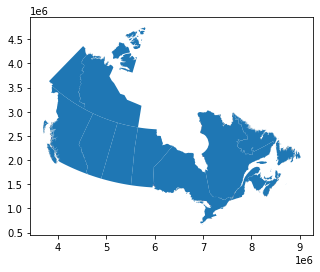

In [ ]:
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt

C:\Users\Maln\AppData\Roaming\Python\Python37\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.7) or chardet (4.0.0) doesn't match a supported version!
  RequestsDependencyWarning)


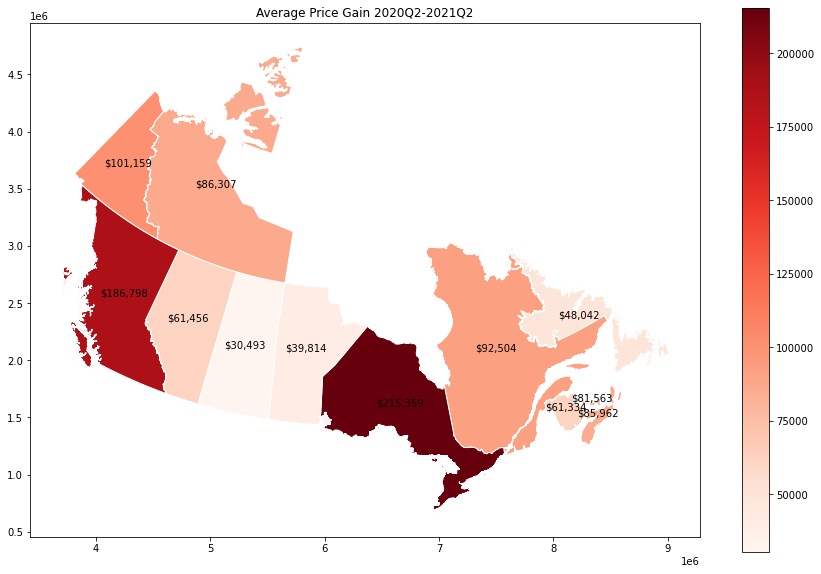

In [63]:
fig,ax = plt.subplots(1,1,figsize=(15,10))
ax.set_title('Average Price Gain 2020Q2-2021Q2')
           
province.plot(column='Average Price Increase',cmap='Reds', legend=True, figsize=(15, 10),edgecolor='white', ax=ax)
for x, y, label in zip(province.geometry.centroid.x, province.geometry.centroid.y, province['Average Price Increase']):
    ax.annotate("${:,.0f}".format(label), xy=((x-200000), y), xytext=(1, 1), textcoords="offset points")
    
plt.savefig('can_prov.png',facecolor='white',transparent=False)